In [67]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Wczytanie danych i krótki przegląd

In [68]:
data = pd.read_csv("messy_data.csv",na_values=' ')

In [69]:
data.head()

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.5,IF,D,Ideal,5.1,5.15,3.20,61.5,NaN,3000.0
1,0.7,vvs2,E,premium,5.7,NaN,3.52,62.0,59.0,4500.0
2,NaN,Si2,h,Good,4.3,4.31,NaN,62.3,56.0,700.0
3,1.2,if,d,ideal,NaN,6.82,4.20,61.7,58.0,10000.0
4,0.9,I1,J,Fair,6.0,NaN,3.70,61.7,NaN,2400.0


In [70]:
#Usuwam sobie spacje w nazwach kolumn dla uproszczenia dalszego pisania kodu
data.columns = data.columns.str.replace(' ', '')

In [71]:
data.describe(include='all')

,carat,clarity,color,cut,xdimension,ydimension,zdimension,depth,table,price
count,150.000000,200,200,200,197.000000,136.000000,152.000000,133.000000,167.000000,196.000000
unique,NaN,14,15,12,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,i1,G,Premium,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,26,36,34,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.799000,NaN,NaN,NaN,5.885787,5.829706,3.694671,62.316541,56.910180,11410.714286
std,0.321827,NaN,NaN,NaN,0.770172,0.767402,0.462431,0.326408,1.421972,40072.669086
min,0.200000,NaN,NaN,NaN,3.900000,3.890000,2.410000,61.200000,54.000000,500.000000
25%,0.512500,NaN,NaN,NaN,5.300000,5.290000,3.350000,62.100000,56.000000,2600.000000
50%,0.750000,NaN,NaN,NaN,5.900000,5.850000,3.715000,62.300000,57.000000,4350.000000
75%,1.050000,NaN,NaN,NaN,6.500000,6.512500,4.082500,62.600000,58.000000,7900.000000


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carat       150 non-null    float64
 1   clarity     200 non-null    object 
 2   color       200 non-null    object 
 3   cut         200 non-null    object 
 4   xdimension  197 non-null    float64
 5   ydimension  136 non-null    float64
 6   zdimension  152 non-null    float64
 7   depth       133 non-null    float64
 8   table       167 non-null    float64
 9   price       196 non-null    float64
dtypes: float64(7), object(3)
memory usage: 15.8+ KB


Czyszczenie

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carat       150 non-null    float64
 1   clarity     200 non-null    object 
 2   color       200 non-null    object 
 3   cut         200 non-null    object 
 4   xdimension  197 non-null    float64
 5   ydimension  136 non-null    float64
 6   zdimension  152 non-null    float64
 7   depth       133 non-null    float64
 8   table       167 non-null    float64
 9   price       196 non-null    float64
dtypes: float64(7), object(3)
memory usage: 15.8+ KB


In [74]:
#Duplikaty
print('Duplicate rows:', data.duplicated().sum())


Duplicate rows: 0


In [75]:
data.value_counts(data['carat'])

carat
0.50    13
0.55    12
0.40    10
0.45     9
0.65     8
0.70     8
0.75     8
1.05     8
0.60     7
1.30     7
0.85     7
0.90     7
0.95     6
1.20     6
1.15     5
1.40     5
1.25     4
0.80     4
1.10     4
0.35     4
1.00     2
1.35     2
1.50     1
0.20     1
0.30     1
1.60     1
Name: count, dtype: int64

In [76]:
data.value_counts(data['clarity'])

clarity
 i1      26
 VVS1    23
 si2     23
 IF      20
 VVS2    19
 si1     18
 vvs2    18
 Si2     16
 Si1     12
 vvs1    11
 I1       5
 SI2      5
 if       3
 Vvs1     1
Name: count, dtype: int64

In [77]:
data['clarity'] = data['clarity'].str.upper()

In [78]:
data.value_counts(data['color'])

color
 G            36
 I            33
 H            30
 F            24
 D            13
 E            13
 e            12
 d             9
 colorless     6
 f             6
 j             6
 g             4
 h             4
 Colorless     2
 J             2
Name: count, dtype: int64

In [79]:
data['color'] = data['color'].str.upper()

In [80]:
data.value_counts(data['cut'])

cut
 Premium      34
 Good         30
 fair         24
 Ideal        23
 good         21
 very good    19
 Fair         12
 Very good    10
 Very Good     9
 ideal         9
 premium       7
 very Good     2
Name: count, dtype: int64

In [81]:
data['cut'] = data['cut'].str.upper()

In [82]:
data.value_counts(data['price'])

price
2600.0      7
2500.0      5
2300.0      5
7900.0      5
2200.0      5
           ..
600.0       1
6000.0      1
6400.0      1
6700.0      1
350000.0    1
Name: count, Length: 89, dtype: int64

In [83]:
data.columns

Index(['carat', 'clarity', 'color', 'cut', 'xdimension', 'ydimension',
       'zdimension', 'depth', 'table', 'price'],
      dtype='object')

In [84]:
print('Unique values in categorical columns:')
for col in data.select_dtypes(include=['object']).columns:
    print(col, data[col].unique())

Unique values in categorical columns:
clarity [' IF' ' VVS2' ' SI2' ' I1' ' SI1' ' VVS1']
color [' D' ' E' ' H' ' J' ' G' ' F' ' I' ' COLORLESS']
cut [' IDEAL' ' PREMIUM' ' GOOD' ' FAIR' ' VERY GOOD']


In [85]:
data.describe(include='all')

,carat,clarity,color,cut,xdimension,ydimension,zdimension,depth,table,price
count,150.000000,200,200,200,197.000000,136.000000,152.000000,133.000000,167.000000,196.000000
unique,NaN,6,8,5,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,SI2,G,GOOD,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,44,40,51,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.799000,NaN,NaN,NaN,5.885787,5.829706,3.694671,62.316541,56.910180,11410.714286
std,0.321827,NaN,NaN,NaN,0.770172,0.767402,0.462431,0.326408,1.421972,40072.669086
min,0.200000,NaN,NaN,NaN,3.900000,3.890000,2.410000,61.200000,54.000000,500.000000
25%,0.512500,NaN,NaN,NaN,5.300000,5.290000,3.350000,62.100000,56.000000,2600.000000
50%,0.750000,NaN,NaN,NaN,5.900000,5.850000,3.715000,62.300000,57.000000,4350.000000
75%,1.050000,NaN,NaN,NaN,6.500000,6.512500,4.082500,62.600000,58.000000,7900.000000


In [86]:
data.head()

,carat,clarity,color,cut,xdimension,ydimension,zdimension,depth,table,price
0,0.5,IF,D,IDEAL,5.1,5.15,3.20,61.5,NaN,3000.0
1,0.7,VVS2,E,PREMIUM,5.7,NaN,3.52,62.0,59.0,4500.0
2,NaN,SI2,H,GOOD,4.3,4.31,NaN,62.3,56.0,700.0
3,1.2,IF,D,IDEAL,NaN,6.82,4.20,61.7,58.0,10000.0
4,0.9,I1,J,FAIR,6.0,NaN,3.70,61.7,NaN,2400.0


In [87]:
#Tworze tymczasowy .csv aby miec lepszy wglad na zmiany 
data.to_csv('tymczasowe.csv', index=False, sep=';', encoding='utf-8')

In [88]:
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['clarity', 'color', 'cut']


In [89]:
missing_values_count = data.isna().sum()
missing_values_count

carat         50
clarity        0
color          0
cut            0
xdimension     3
ydimension    64
zdimension    48
depth         67
table         33
price          4
dtype: int64

In [90]:
#Minimalne wartości dla x, y i z wynoszą tutaj 0, ale nie jest to możliwe. ponieważ są to długość, szerokość i głębokość
data = data.drop(data[data["xdimension"]==0].index)
data = data.drop(data[data["ydimension"]==0].index)
data = data.drop(data[data["zdimension"]==0].index)

In [91]:
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].apply(lambda x: x.fillna(x.mean()))


In [92]:
data.describe()

,carat,xdimension,ydimension,zdimension,depth,table,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.799000,5.885787,5.829706,3.694671,62.316541,56.910180,11410.714286
std,0.278477,0.764344,0.632067,0.402818,0.265841,1.298729,39667.884273
min,0.200000,3.900000,3.890000,2.410000,61.200000,54.000000,500.000000
25%,0.587500,5.300000,5.580000,3.477500,62.200000,56.000000,2600.000000
50%,0.799000,5.900000,5.829706,3.694671,62.316541,57.000000,4450.000000
75%,0.950000,6.500000,6.165000,3.970000,62.400000,58.000000,8025.000000
max,1.600000,7.300000,7.280000,4.500000,63.000000,60.000000,350000.000000


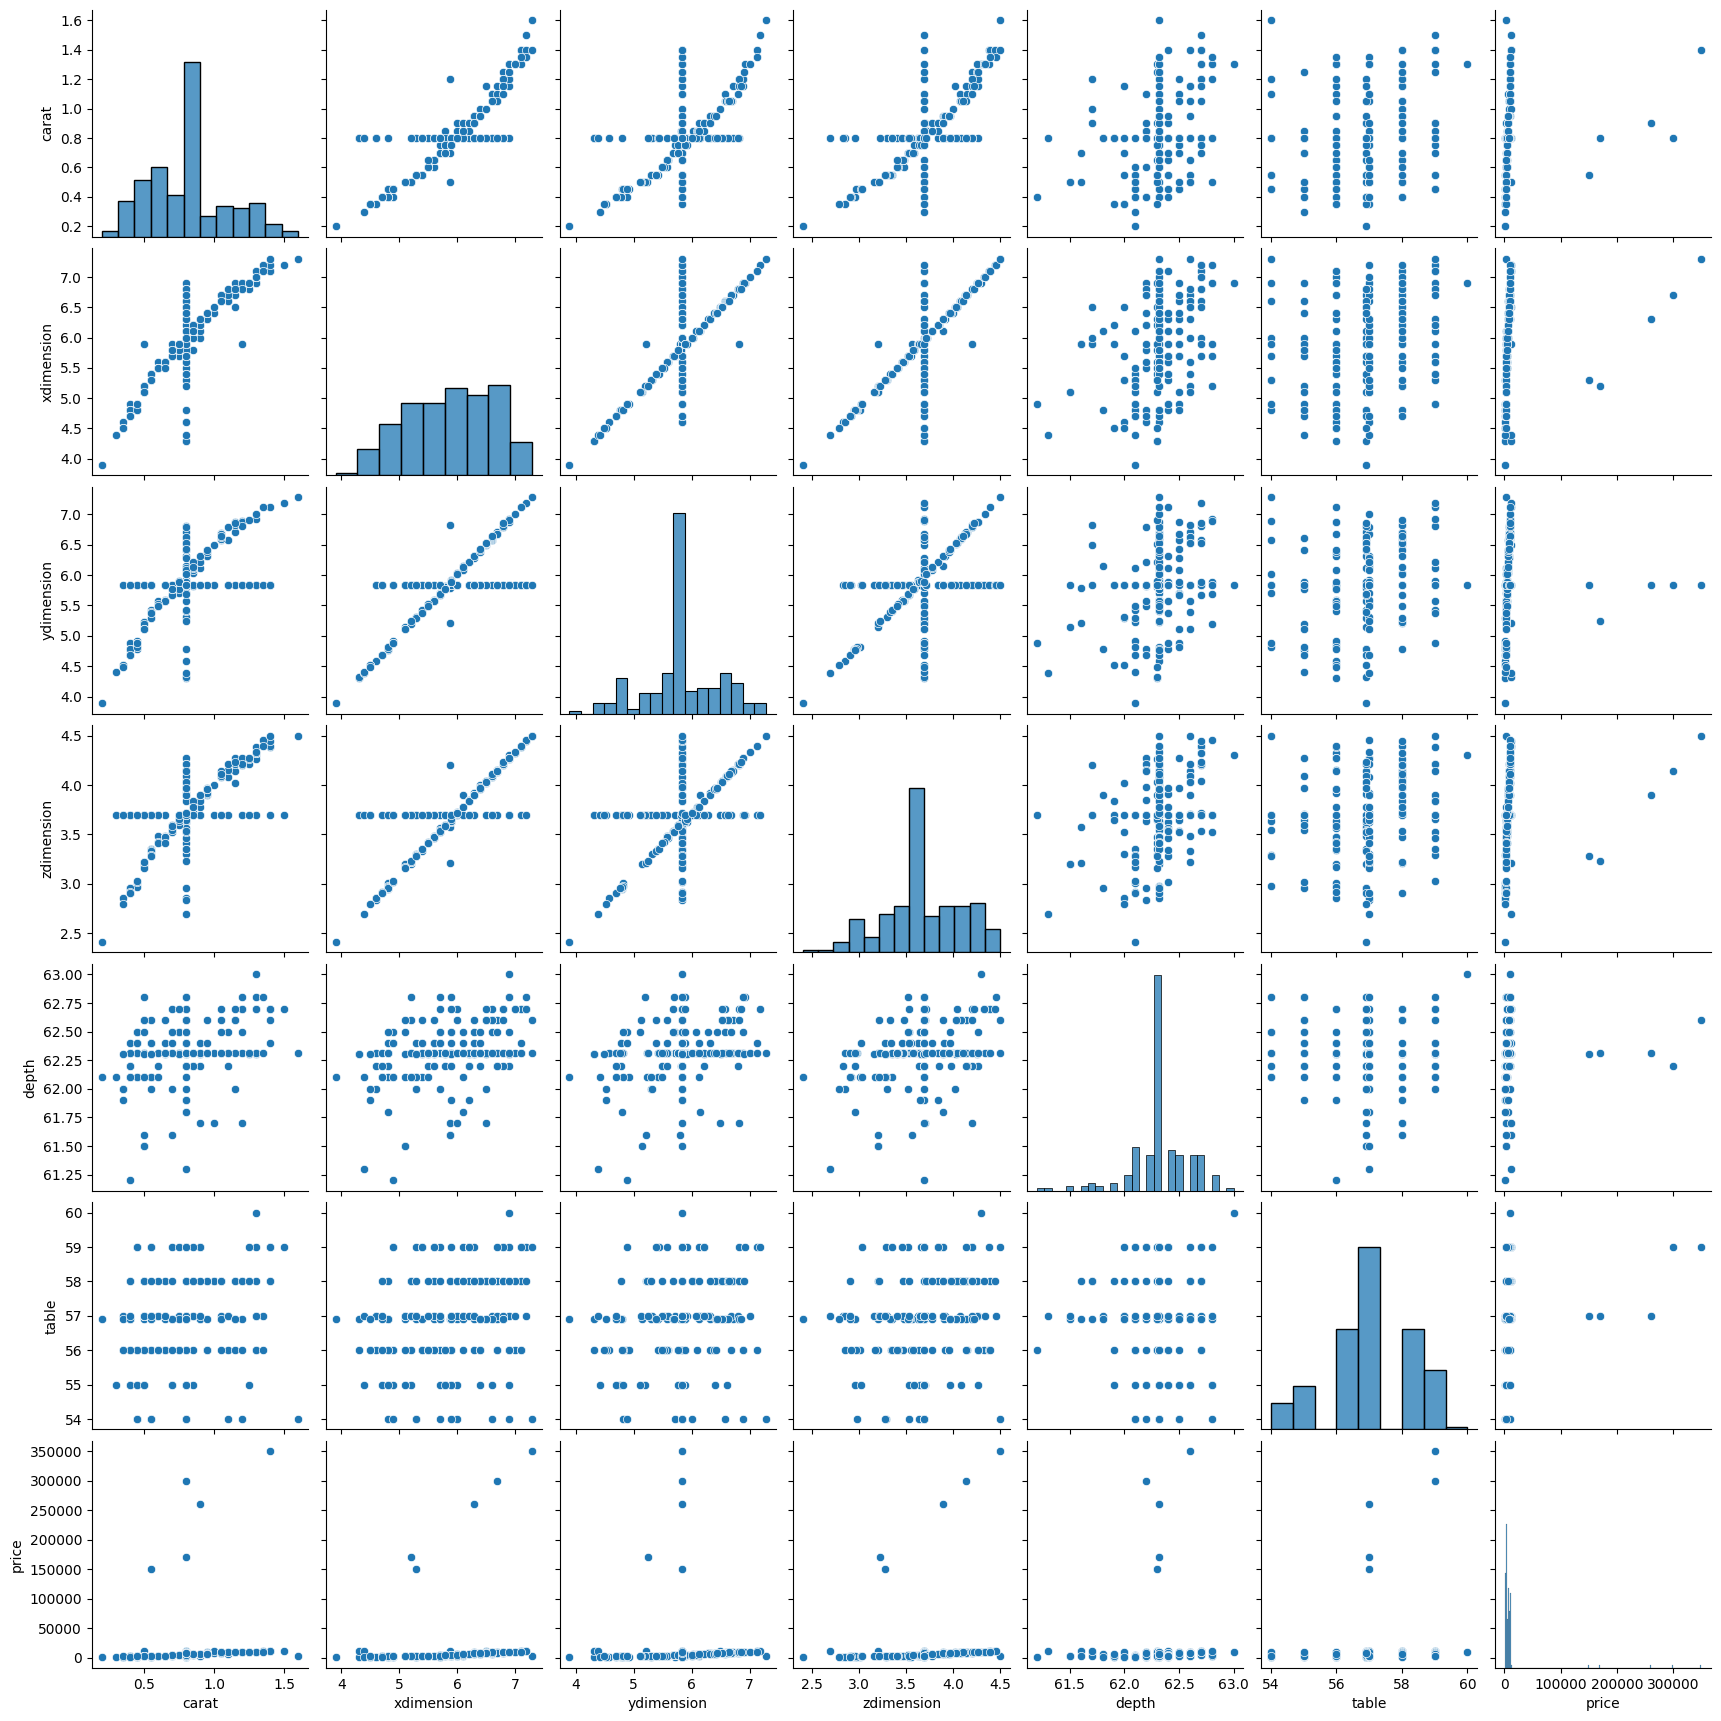

In [93]:
ax=sns.pairplot(data)

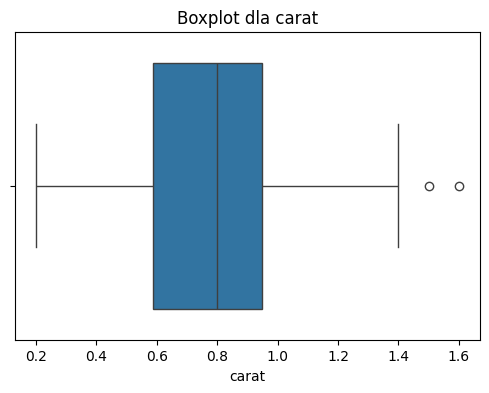

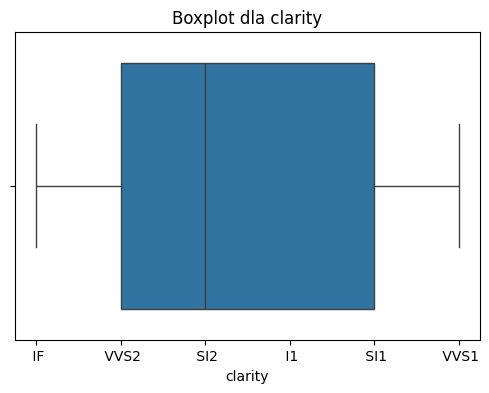

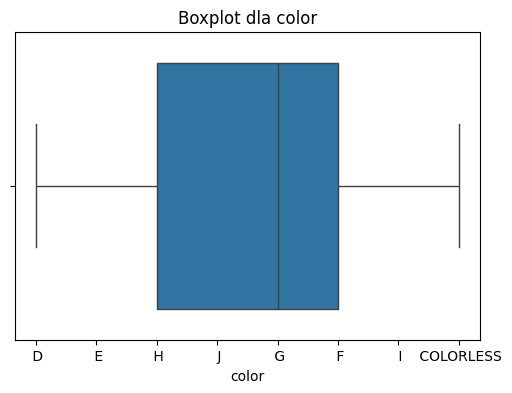

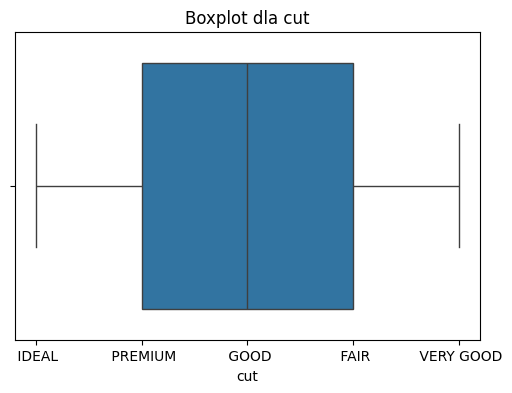

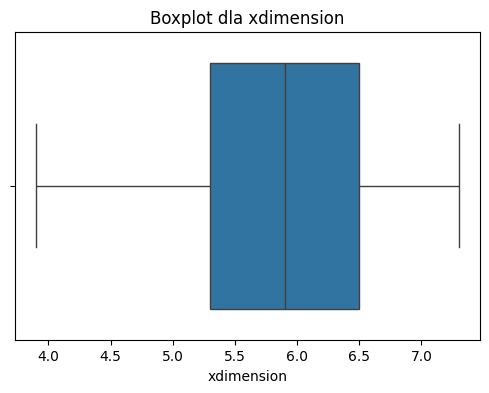

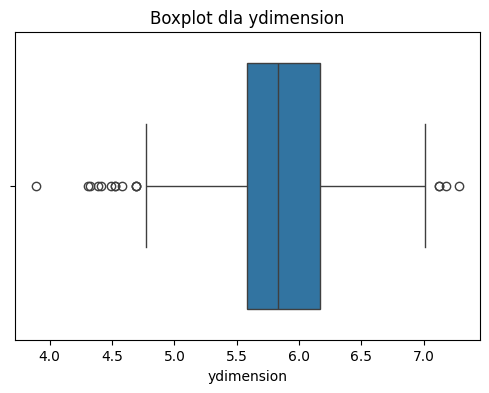

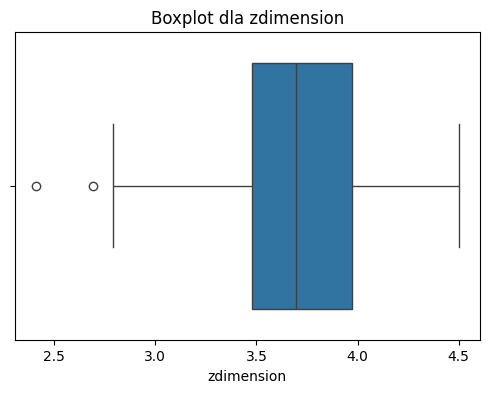

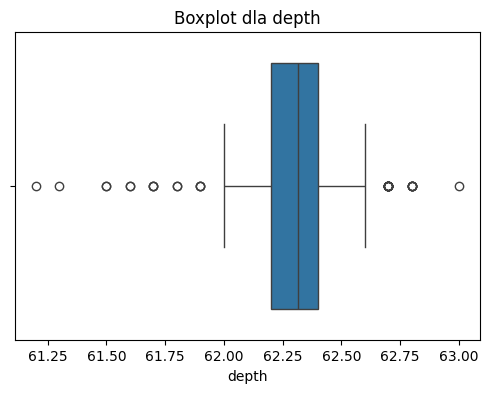

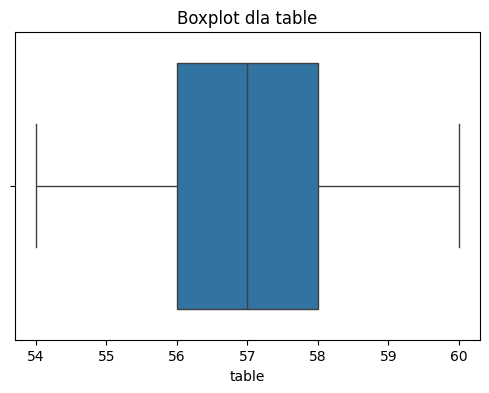

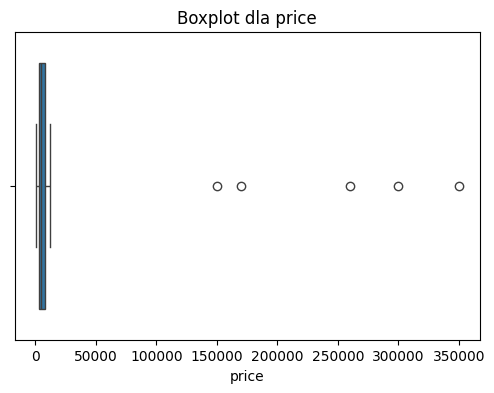

In [94]:
for column in data.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[column])  
    plt.title(f'Boxplot dla {column}')
    plt.show()

In [95]:
for column_name in numeric_columns:
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Usuwamy wartości odstające
    data = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]

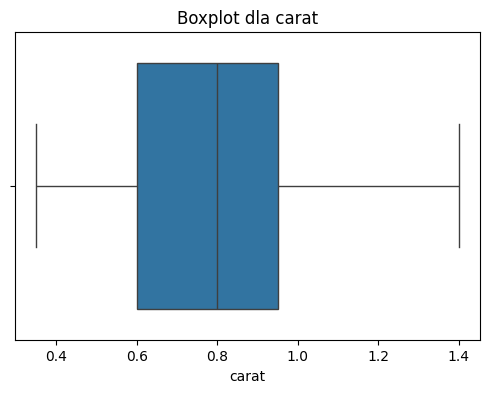

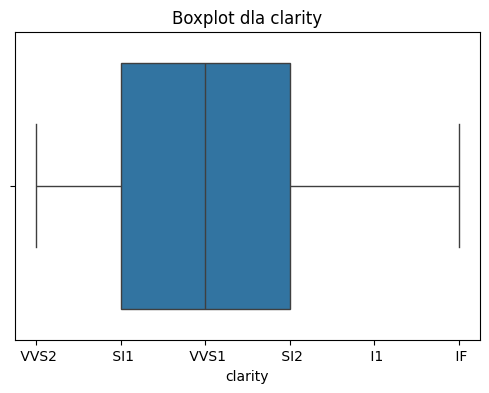

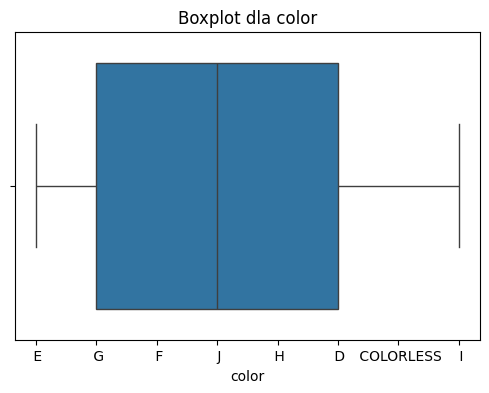

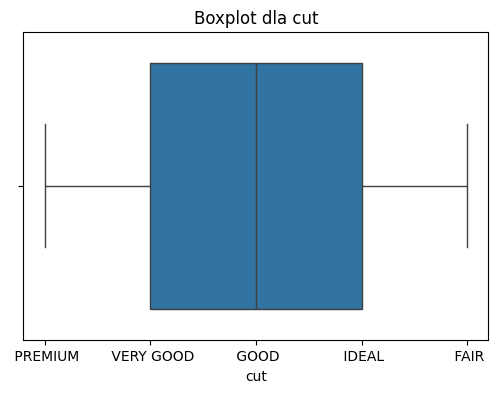

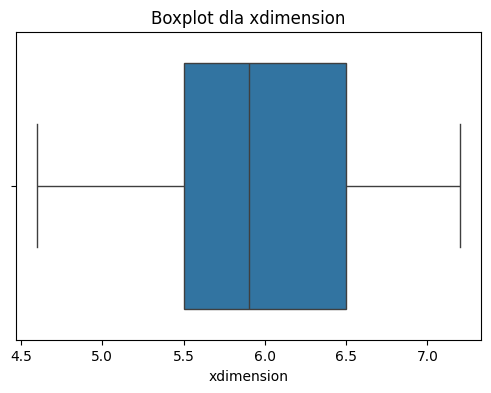

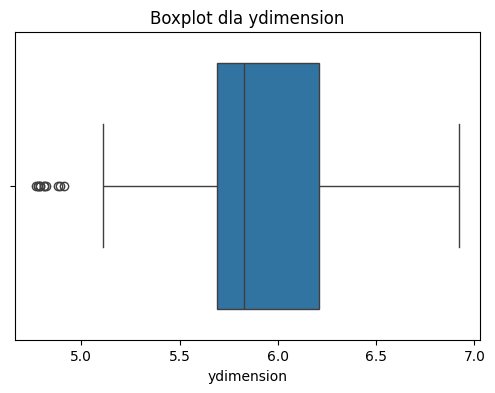

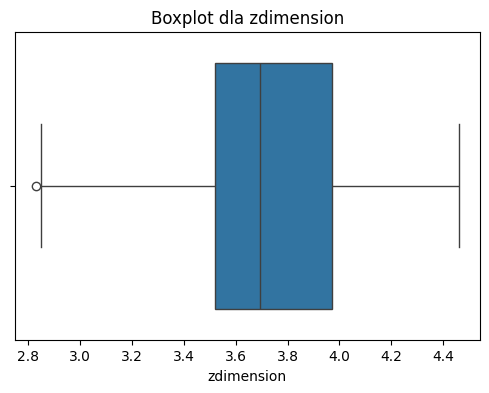

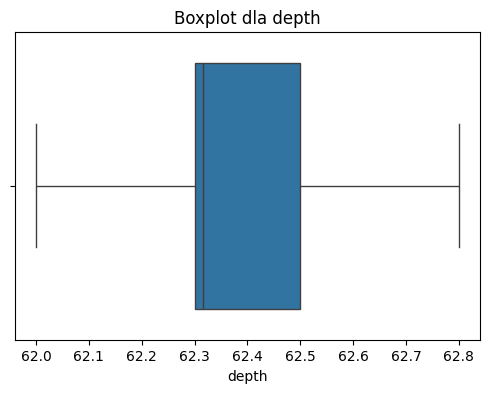

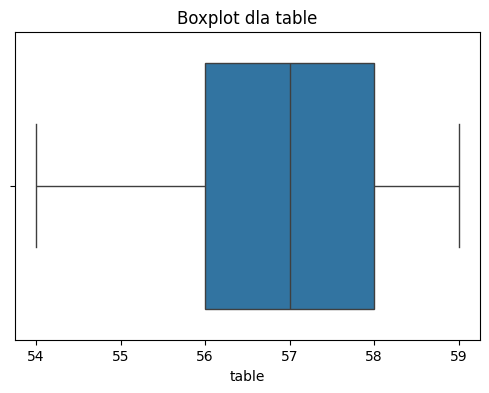

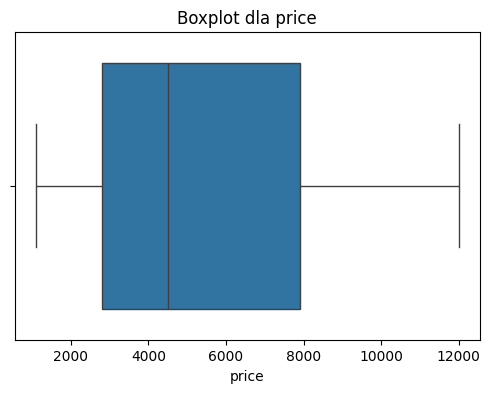

In [96]:
for column in data.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[column])  
    plt.title(f'Boxplot dla {column}')
    plt.show()

In [97]:
data.describe()

,carat,xdimension,ydimension,zdimension,depth,table,price
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,0.800364,5.951515,5.901478,3.717621,62.372076,56.895482,5455.757576
std,0.251338,0.671784,0.507154,0.366045,0.187234,1.305241,2980.287912
min,0.350000,4.600000,4.770000,2.830000,62.000000,54.000000,1100.000000
25%,0.600000,5.500000,5.690000,3.520000,62.300000,56.000000,2800.000000
50%,0.799000,5.900000,5.829706,3.694671,62.316541,57.000000,4500.000000
75%,0.950000,6.500000,6.210000,3.970000,62.500000,58.000000,7900.000000
max,1.400000,7.200000,6.920000,4.460000,62.800000,59.000000,12000.000000


Wizualizacje

In [102]:
import plotly.express as px

In [113]:
# Zakładając, że data to DataFrame zawierający Twoje dane
for column in data.columns:
    fig = px.histogram(data, x=column, marginal='box', nbins=30, title=f'Histogram - {column}')
    fig.show()

In [105]:
fig = px.histogram(data, x='cut')
fig.update_layout(title='Liczba obserwacji dla każdej kategorii "cut"', xaxis_title='cut')
fig.show()

In [107]:
fig = px.box(data, x='cut', y='price')

# Jeśli potrzebujesz dostosować wykres, możesz użyć różnych opcji, na przykład:
fig.update_layout(title='Boxplot dla "cut" i "price"', xaxis_title='cut', yaxis_title='price')

# Wyświetlenie wykresu
fig.show()